# Orbit-Generation-testing

In [1]:
from orbit_generation_testing.reader import *
from orbit_generation_testing.visualize import *
from orbit_generation_testing.stats import *

In [2]:
mat_data= get_example_mat_data()
mat_data.shape

(200, 6, 300)

In [3]:
h5_data= get_example_h5_data()
h5_data.shape

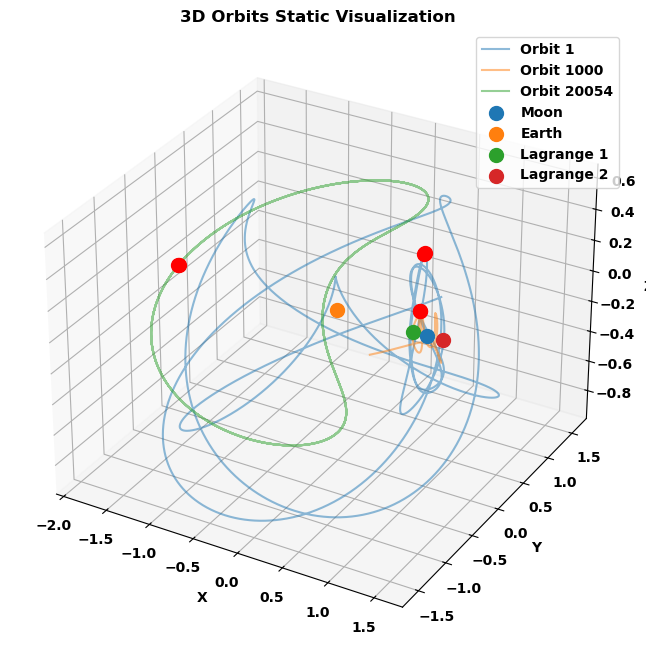

In [ ]:
visualize_static_orbits(h5_data, orbit_indices= [1,1000,20054], time_instants=[0,1499], show_legend=True)

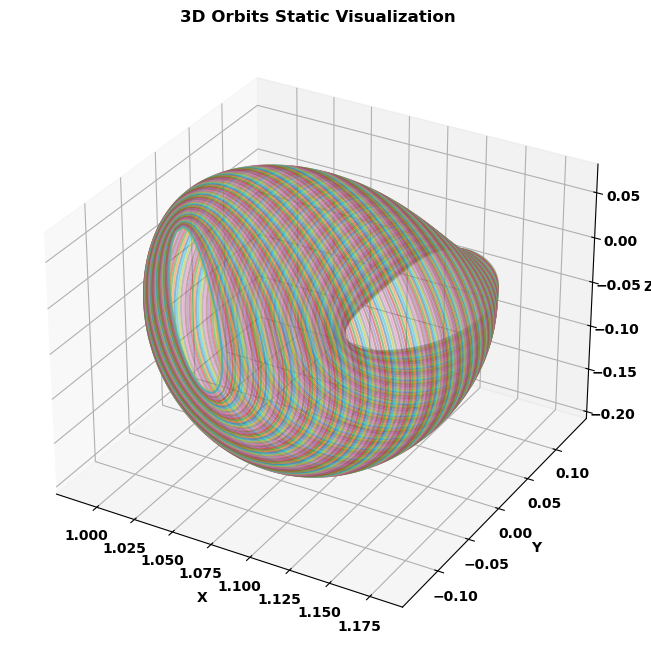

In [6]:
visualize_static_orbits(mat_data, point_dict=None)

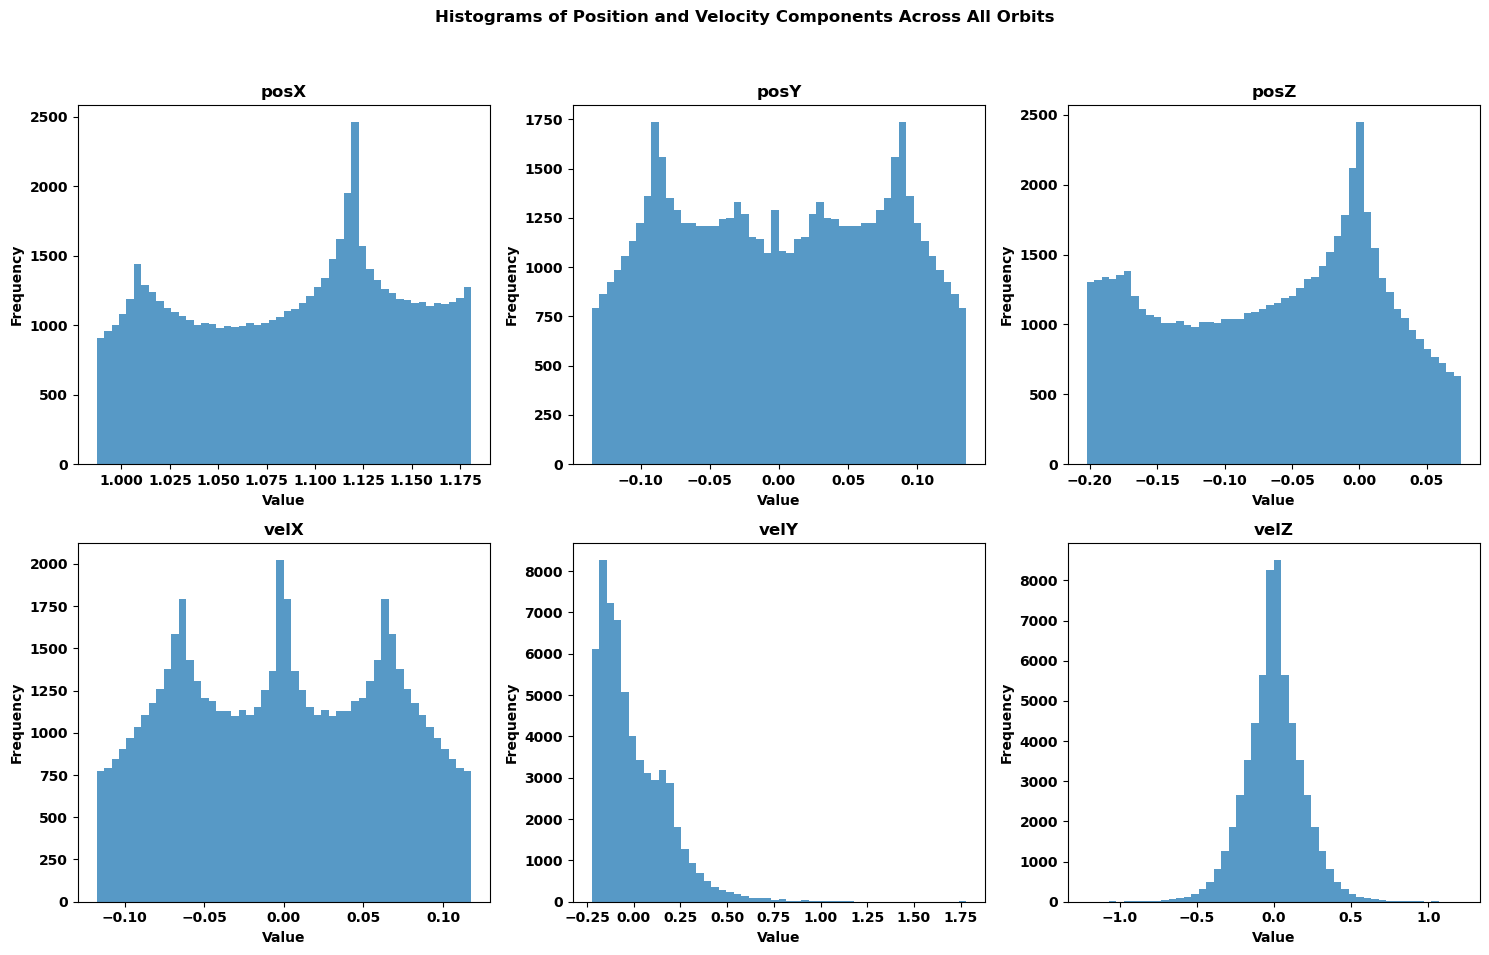

In [4]:
plot_histograms(mat_data)

In [7]:
export_dynamic_orbits_html(mat_data)

Visualization saved to orbits.html
